# **Triaje Dental Difuso**

### Curso: Sistemas Inteligentes - Sección 5

### Docente: Mamani Macedo, Nestor adolfo

### Grupo 10
**Integrantes:**

- Mejía Carrasco, Marlo Gabriel
- Rezza Valencia, Francesca Renee
- Serrato Vargas, José Eduardo

**Objetivo**: Implementar un sistema de triage dental (educativo) usando la librería personalizada `fuzzy.py` (funciones de membresía, corte, unión y desfuzzificación).

In [53]:
# Librerías requeridas
import numpy as np
from matplotlib import pyplot as plt
from fuzzy import *

## 1) Definición de variables lingüísticas (entradas y salidas)

In [80]:
# ================================================================
# 1) Definición de variables lingüísticas (entradas y salidas)
# ================================================================
# En esta sección se definen los *universos de discurso* para cada
# variable lingüística del sistema difuso. Estas variables representan
# tanto las entradas clínicas del triaje dental como las salidas
# diagnósticas inferidas por el modelo Mamdani.
#
# Cada universo corresponde a un rango continuo de valores posibles
# sobre los cuales se evaluarán las funciones de membresía (MFs).
# ---------------------------------------------------------------

# -------------------------
# Entradas (universos de discurso)
# -------------------------
# 1. Intensidad del dolor (0–10)
#    Escala analógica del dolor percibido por el paciente,
#    comúnmente usada en odontología clínica (VAS o EVA).
dolor = np.linspace(0, 10, 100)

# 2. Sensibilidad al frío (0–10)
#    Representa el grado de respuesta del paciente ante estímulos fríos,
#    asociado a hipersensibilidad dentinaria o procesos cariosos.
frio = np.linspace(0, 10, 100)

# 3. Porcentaje de sangrado en el cepillado (0–100 %)
#    Indica la frecuencia o severidad del sangrado gingival durante
#    el cepillado dental, expresado en porcentaje estimado.
sang = np.linspace(0, 100, 300)

# 4. Índice de placa (0–3)
#    Mide la acumulación de placa bacteriana; se basa en escalas
#    simplificadas como el OHI-S (Índice de Higiene Oral Simplificado).
placa = np.linspace(0, 3, 300)

# 5. Profundidad de sondaje (0–10 mm)
#    Corresponde a la profundidad de los surcos gingivales o bolsas
#    periodontales, medida con una sonda milimetrada.
sond = np.linspace(0, 10, 100)

# -------------------------
# Salidas (0–100)
# -------------------------
# Variables lingüísticas de salida del sistema difuso:
#   - riesgo_caries
#   - riesgo_gingivitis
#   - riesgo_periodontitis
#   - urgencia

# Cada una se representa sobre un mismo universo de 0 a 100,
# que facilita la interpretación del grado de riesgo o prioridad clínica.
y = np.linspace(0, 100, 401)

In [81]:
# Funciones de membresía de ENTRADAS (triangulares/trapezoidales)

# Variable 1: Intensidad del dolor (0-10)
# Intensidad de dolor bajo (0-3)
D_bajo  = trapmf(dolor, [0, 0, 3, 5])
# Intensidad de dolor medio (3-7)
D_medio = trimf(dolor, [3, 5, 7])
# Intensidad de dolor alto (7-10)
D_alto  = trapmf(dolor, [5, 7, 10, 10])

# Variable 2: Sensibilidad al frio (0-10)
# Sensibilidad al frío baja
F_bajo  = trapmf(frio, [0, 0, 3, 5])
# Sensibilidad al frío media
F_medio = trimf(frio, [3, 5, 7])
# Sensibilidad al frío alta
F_alto  = trapmf(frio, [5, 7, 10, 10])

# Porcentaje de sangrado en el cepillado (0-100 %)
# Porcentaje de sangrado nulo
S_nulo     = trapmf(sang, [0, 0, 20, 40])
# Porcentaje de sangrado leve
S_leve     = trimf(sang, [20, 40, 60])
# Porcentaje de sangrado moderado
S_moderado = trimf(sang, [40, 60, 80])
# Porcentaje de sangrado severo
S_severo   = trapmf(sang, [60, 80, 100, 100])

# Indice de placa (0-3)
# Indice bajo
P_bajo  = trapmf(placa, [0.0, 0.0, 1.0, 1.5])
# Indice medio
P_medio = trimf(placa, [1.0, 1.5, 2.0])
# Indice alto
P_alto  = trapmf(placa, [1.5, 2.0, 3.0, 3.0])

# Profundidad del Sondaje (0-10 mm)
# Profundidad normal
R_normal    = trapmf(sond, [0, 0, 3, 5])
# Profundidad moderada
R_moderada  = trimf(sond, [3, 5, 7])
# Profundidad profunda
R_profunda  = trapmf(sond, [5, 7, 10, 10])

In [82]:
# Funciones de membresía de SALIDAS (0-100):
# Salida baja
OUT_bajo  = trapmf(y, [0, 0, 20, 35])
# Salida media
OUT_medio = trimf(y, [30, 50, 70])
# Salida alta
OUT_alto  = trapmf(y, [65, 80, 100, 100])

### Graficar funciones de membresía

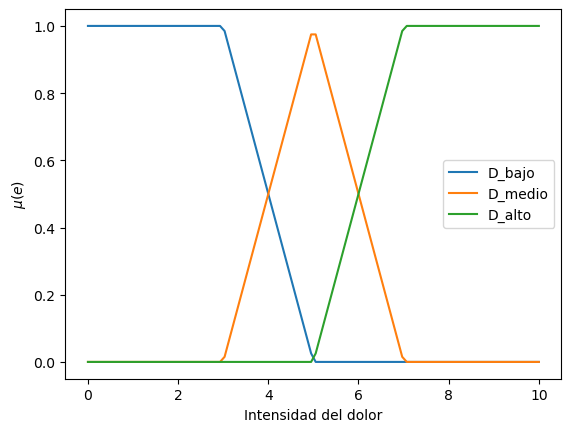

In [83]:
# Función de membresía de Intensidad del dolor
plt.plot(dolor, D_bajo, label="D_bajo")
plt.plot(dolor, D_medio, label="D_medio")
plt.plot(dolor, D_alto, label="D_alto")
plt.legend(loc='best')
plt.xlabel('Intensidad del dolor')
plt.ylabel('$\mu (e)$')
plt.show()

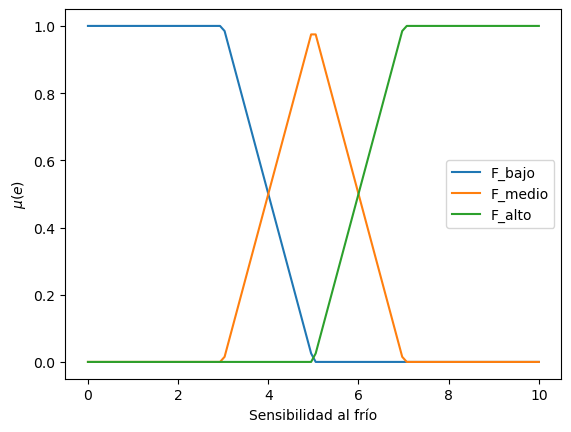

In [84]:
# Función de membresía de Sensibilidad al frío
plt.plot(frio, F_bajo, label="F_bajo")
plt.plot(frio, F_medio, label="F_medio")
plt.plot(frio, F_alto, label="F_alto")
plt.legend(loc='best')
plt.xlabel('Sensibilidad al frío')
plt.ylabel('$\mu (e)$')
plt.show()

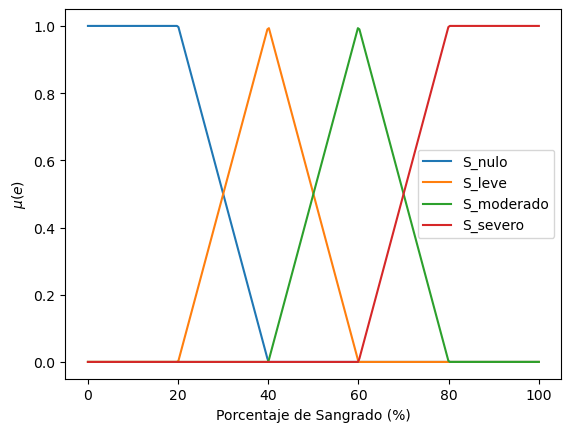

In [85]:
# Función de membresía del Porcentaje de Sangrado en el Cepillado
plt.plot(sang, S_nulo, label="S_nulo")
plt.plot(sang, S_leve, label="S_leve")
plt.plot(sang, S_moderado, label="S_moderado")
plt.plot(sang, S_severo, label="S_severo")
plt.legend(loc='best')
plt.xlabel('Porcentaje de Sangrado (%)')
plt.ylabel('$\mu (e)$')
plt.show()

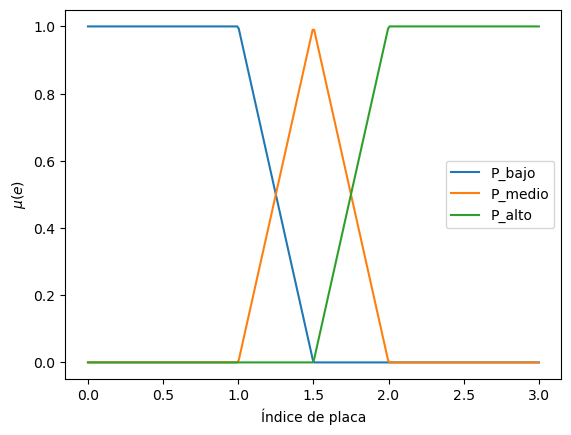

In [86]:
# Función de membresía de Indice de placa
plt.plot(placa, P_bajo, label="P_bajo")
plt.plot(placa, P_medio, label="P_medio")
plt.plot(placa, P_alto, label="P_alto")
plt.legend(loc='best')
plt.xlabel('Índice de placa')
plt.ylabel('$\mu (e)$')
plt.show()

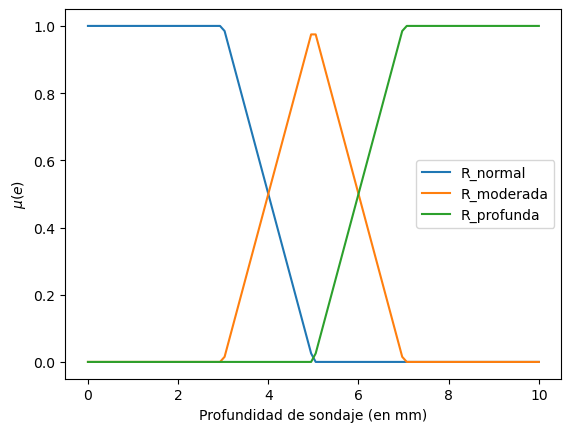

In [87]:
# Función de membresía de Profundidad del Sondaje (en mm)
plt.plot(sond, R_normal, label="R_normal")
plt.plot(sond, R_moderada, label="R_moderada")
plt.plot(sond, R_profunda, label="R_profunda")
plt.legend(loc='best')
plt.xlabel('Profundidad de sondaje (en mm)')
plt.ylabel('$\mu (e)$')
plt.show()


## 2) Base de reglas (Mamdani, implicación min, agregación max)

Definimos reglas para cuatro salidas:
- **riesgo_caries**
- **riesgo_gingivitis**
- **riesgo_periodontitis**
- **urgencia** (derivada de condiciones de dolor y severidad)


In [88]:
# ---------------------------------------------------------------
# Fase 2: REGLAS DE MAMDANI
# ---------------------------------------------------------------
# Cada regla describe una situación tipo:
# "SI (una o varias condiciones difusas) ENTONCES (una salida difusa)"
#
# - Los "SI" (antecedentes) usan grados de pertenencia entre 0 y 1.
# - El "ENTONCES" (consecuente) es una curva de salida recortada
#   según la fuerza con la que se cumple la condición (α).
# ---------------------------------------------------------------

# Calcula qué tan fuerte se cumple una regla (α = mínimo de los antecedentes)
def rule_strength(*valores):
    return min(valores)

# Aplica la regla: recorta la curva de salida a la altura α
def apply_rule(alpha, salida_mf):
    # Devuelve la curva de salida “cortada” según qué tanto se cumplió la regla
    return cut(alpha, salida_mf)

# Combina los resultados de todas las reglas que afectan la misma salida
def aggregate(lista_mf):
    # Si hay varias reglas para una misma salida, se unen tomando el máximo punto a punto
    # (la envolvente de todas las curvas recortadas)
    return union(lista_mf) if lista_mf else np.zeros_like(y)

In [89]:
# ---------------------------------------------------------------
# Helper: grado de pertenencia para un valor escalar
# ---------------------------------------------------------------
def mu(universe, mf_curve, v):
    """
    Calcula el grado de pertenencia μ de un valor 'v' dentro de una
    función de membresía (mf_curve) definida sobre un universo dado.

    - universe : eje de la variable (por ejemplo, np.linspace(0, 10, 301))
    - mf_curve : valores de pertenencia (array)
    - v        : valor escalar a evaluar

    Retorna un número entre 0 y 1.
    """
    return float(np.interp(v, universe, mf_curve, left=0.0, right=0.0))

In [90]:
# Cada función representa un conjunto de reglas difusas que calculan
# el "grado de riesgo" o "nivel de urgencia" según las variables de entrada.
# 
# Paso a paso:
# 1) Se evalúan los antecedentes (qué tanto se cumplen las condiciones).
# 2) Se calcula la fuerza de disparo α (AND = mínimo, OR = máximo).
# 3) Se recorta la curva de salida (apply_rule).
# 4) Se combinan las reglas que afectan a la misma salida (aggregate).
# ================================================================

# -------------------------------
# Riesgo de Caries
# -------------------------------
def eval_caries(d, f, p):
    """
    Evalúa el riesgo de caries en función de:
      - d: dolor
      - f: sensibilidad al frío
      - p: nivel de placa
    """
    # α de cada antecedente (usar universos correctos)
    a1 = mu(placa, P_alto,  p);  b1 = mu(frio,  F_alto,  f)
    a2 = mu(placa, P_medio, p);  b2 = mu(frio,  F_medio, f)
    a3 = mu(placa, P_bajo,  p);  b3 = mu(frio,  F_bajo,  f)

    # Placa alta y sensibilidad alta -> riesgo ALTO
    r1 = apply_rule(rule_strength(a1, b1), OUT_alto)

    # Placa media y sensibilidad media -> riesgo MEDIO
    r2 = apply_rule(rule_strength(a2, b2), OUT_medio)

    # Placa baja y sensibilidad baja -> riesgo BAJO
    r3 = apply_rule(rule_strength(a3, b3), OUT_bajo)

    # Combina todas las reglas anteriores
    return aggregate([r1, r2, r3])


# -------------------------------
# Riesgo de Gingivitis
# -------------------------------
def eval_gingivitis(s, p):
    """
    Evalúa el riesgo de gingivitis en función de:
      - s: sangrado
      - p: placa
    """

    a4 = mu(sang,  S_severo, s);  b4 = mu(placa, P_alto,  p)
    a5 = mu(sang,  S_moderado, s)
    a6 = mu(sang,  S_nulo,     s)

    # Sangrado severo y placa alta -> ALTO
    r4 = apply_rule(rule_strength(a4, b4), OUT_alto)

    # Sangrado moderado -> MEDIO
    r5 = apply_rule(a5, OUT_medio)

    # Sangrado nulo -> BAJO
    r6 = apply_rule(a6, OUT_bajo)

    return aggregate([r4, r5, r6])

# -------------------------------
# Riesgo de Periodontitis
# -------------------------------
def eval_periodontitis(sondaje, s):
    """
    Evalúa el riesgo de periodontitis en función de:
      - sondaje: profundidad periodontal
      - s: sangrado
    """

    rp = mu(sond, R_profunda,  sondaje)
    rm = mu(sond, R_moderada,  sondaje)
    rn = mu(sond, R_normal,    sondaje)
    sm = mu(sang, S_moderado,  s)
    ss = mu(sang, S_severo,    s)
    sl = mu(sang, S_leve,      s)
    
    # Sondaje profundo y (sangrado moderado o severo) -> ALTO
    r7 = apply_rule(rule_strength(rp, max(sm, ss)), OUT_alto)

    # Sondaje moderado y (sangrado leve o moderado) -> MEDIO
    r8 = apply_rule(rule_strength(rm, max(sl, sm)), OUT_medio)

    # Sondaje normal -> BAJO
    r9 = apply_rule(rn, OUT_bajo)

    return aggregate([r7, r8, r9])

# -------------------------------
# Nivel de Urgencia
# -------------------------------
def eval_urgencia(d, f, sondaje, s, p):
    """
    Evalúa el nivel de urgencia según:
      - d: dolor
      - f: frío
      - sondaje: profundidad periodontal
      - s: sangrado
      - p: placa
    """
    da = mu(dolor, D_alto, d);  fm = mu(frio,  F_alto, f)
    dm = mu(dolor, D_medio, d); rp = mu(sond,  R_profunda, sondaje)
    db = mu(dolor, D_bajo, d);  fb = mu(frio,  F_bajo, f)
    sn = mu(sang,  S_nulo, s);  pb = mu(placa, P_bajo, p)
    rn = mu(sond,  R_normal, sondaje)

    # Dolor alto y sensibilidad alta -> urgencia ALTA
    u1 = apply_rule(rule_strength(da, fm), OUT_alto)

    # Dolor medio o sondaje profundo -> urgencia MEDIA
    u2 = apply_rule(max(dm, rp), OUT_medio)

    # Todo bajo/normal -> urgencia BAJA
    u3 = apply_rule(rule_strength(db, fb, sn, pb, rn), OUT_bajo)

    return aggregate([u1, u2, u3])

In [91]:
# ================================================================
# 📊 VISUALIZACIÓN DE FUZZIFICACIÓN (ENTRADAS) Y SALIDAS
# ================================================================
# Esta sección muestra gráficamente:
# La fuzzificación de cada variable de entrada (dolor, frío, sangrado, placa, sondaje),
# es decir, cómo un valor numérico se traduce en grados de pertenencia (μ) a etiquetas difusas.
# Las salidas difusas agregadas (caries, gingivitis, periodontitis y urgencia),
# junto con el valor nítido obtenido tras la defuzzificación (centroide).
# ---------------------------------------------------------------

# ---------------------------------------------------------------
# Función para graficar la fuzzificación de una variable de entrada
# ---------------------------------------------------------------
def plot_fuzzificacion_input(universe, curves_dict, value, var_label):
    """
    Muestra las funciones de membresía de una variable de entrada,
    junto con el valor actual y sus grados de pertenencia.

    - universe     : eje de valores posibles (x)
    - curves_dict  : diccionario con las curvas MF (por ejemplo {'bajo': ..., 'medio': ..., 'alto': ...})
    - value        : valor del paciente (por ejemplo dolor=7.5)
    - var_label    : etiqueta de la variable (para el título y eje x)
    """
    fig, ax = plt.subplots(figsize=(6.5, 3.5))
    
    # Dibuja las curvas de membresía
    for name, curve in curves_dict.items():
        ax.plot(universe, curve, label=name)
        m = mu(universe, curve, value)
        ax.scatter([value], [m], s=35)
        ax.text(value, m+0.04, f'{name}: {m:.2f}', fontsize=9)

    # Línea vertical que marca el valor actual
    ax.axvline(value, linestyle='--', linewidth=1.5, label=f'valor={value}')
    ax.set_title(f'Fuzzificación de {var_label}')
    ax.set_xlabel(var_label)
    ax.set_ylabel('Grado de pertenencia (μ)')
    ax.set_ylim(0, 1.08)
    ax.grid(True, alpha=0.25)
    ax.legend(loc='upper left', ncols=2, frameon=True)
    plt.show()


# ---------------------------------------------------------------
# Función para graficar las salidas agregadas (tras las reglas Mamdani)
# ---------------------------------------------------------------
def plot_output_aggregated(y, mf_agg, out_curves, crisp_value=None, title='Salida agregada'):
    """
    Muestra la salida difusa resultante de la agregación (envolvente de todas las reglas),
    junto con el valor nítido obtenido por defuzzificación (centroide).

    - y            : universo de salida (por ejemplo 0–100)
    - mf_agg       : curva difusa agregada (resultado de las reglas)
    - out_curves   : curvas base de salida (bajo, medio, alto)
    - crisp_value  : valor numérico tras la defuzzificación
    - title        : título del gráfico
    """
    fig, ax = plt.subplots(figsize=(6.5, 3.5))

    # Dibuja las curvas base de salida (referencia)
    for name, curve in out_curves.items():
        ax.plot(y, curve, linestyle='--', linewidth=1.0, label=f'Base {name}')

    # Rellena la curva agregada resultante
    ax.fill_between(y, mf_agg, alpha=0.25, step='mid', label='Agregada')
    ax.plot(y, mf_agg, linewidth=2.0)

    # Marca el centroide (valor final nítido)
    if crisp_value is not None:
        ax.axvline(crisp_value, linestyle='--', linewidth=1.8, label=f'Centroide={crisp_value:.2f}')

    ax.set_title(title)
    ax.set_xlabel('Escala de salida (0–100)')
    ax.set_ylabel('Grado de pertenencia (μ)')
    ax.set_ylim(0, 1.08)
    ax.grid(True, alpha=0.25)
    ax.legend(loc='upper left', ncols=2, frameon=True)
    plt.show()


# ---------------------------------------------------------------
# Diccionarios con las curvas de cada variable
# (ajusta los nombres si tus variables tienen otro nombre)
# ---------------------------------------------------------------
dolor_curves = {'D_bajo': D_bajo, 'D_medio': D_medio, 'D_alto': D_alto}
frio_curves  = {'F_bajo': F_bajo, 'F_medio': F_medio, 'F_alto': F_alto}
sang_curves  = {'S_nulo': S_nulo, 'S_leve': S_leve, 'S_moderado': S_moderado, 'S_severo': S_severo}
placa_curves = {'P_bajo': P_bajo, 'P_medio': P_medio, 'P_alto': P_alto}
sond_curves  = {'R_normal': R_normal, 'R_moderada': R_moderada, 'R_profunda': R_profunda}
out_curves   = {'OUT_bajo': OUT_bajo, 'OUT_medio': OUT_medio, 'OUT_alto': OUT_alto}


# ---------------------------------------------------------------
# Función general: muestra toda la visualización del caso
# ---------------------------------------------------------------
def visualizar_fuzzificacion_y_salidas(dolor0, frio0, sang0, placa0, sondaje0, metodo='centroid'):
    """
    Genera una visualización completa del sistema difuso:
    - Fuzzificación de cada variable de entrada (entradas).
    - Salidas agregadas y valor defuzzificado (salidas).
    """
    # --- Fase 1: Fuzzificación de las entradas ---
    plot_fuzzificacion_input(dolor, dolor_curves,  dolor0,   'Dolor (0–10)')
    plot_fuzzificacion_input(frio,  frio_curves,   frio0,    'Frío (0–10)')
    plot_fuzzificacion_input(sang,  sang_curves,   sang0,    'Sangrado (%)')
    plot_fuzzificacion_input(placa, placa_curves,  placa0,   'Índice de placa (0–3)')
    plot_fuzzificacion_input(sond,  sond_curves,   sondaje0, 'Sondaje (mm)')

    # --- Fase 2 y 3: Inferencia + Defuzzificación ---
    (vals, mfs) = inferir(dolor0, frio0, sang0, placa0, sondaje0, metodo=metodo)
    caries_val, ginv_val, perio_val, urg_val = vals
    mf_caries, mf_gingiv, mf_perio, mf_urg = mfs

    # --- Fase 4: Visualización de salidas ---
    plot_output_aggregated(y, mf_caries, out_curves, caries_val, title='Riesgo de Caries (agregado)')
    plot_output_aggregated(y, mf_gingiv, out_curves, ginv_val,   title='Riesgo de Gingivitis (agregado)')
    plot_output_aggregated(y, mf_perio,  out_curves, perio_val,  title='Riesgo de Periodontitis (agregado)')
    plot_output_aggregated(y, mf_urg,    out_curves, urg_val,    title='Urgencia (agregada)')

## 3) Evaluación y desfuzzificación

In [92]:
# ================================================================
# FASE 3: EVALUACIÓN Y DESFUZIFICACIÓN
# ================================================================
# En esta fase se juntan todas las reglas (fase 2),
# se obtiene la curva difusa resultante para cada diagnóstico
# y luego se calcula un valor numérico representativo
# (por ejemplo, riesgo = 70 sobre 100).
# ================================================================

def inferir(dolor0, frio0, sang0, placa0, sondaje0, metodo='centroid'):
    """
    Calcula los resultados finales del sistema difuso.
    
    Parámetros:
      - dolor0, frio0, sang0, placa0, sondaje0 : valores de entrada del paciente
      - metodo : método de desfuzzificación ('centroid' por defecto)
    
    Devuelve:
      - Tupla con valores numéricos (caries, gingivitis, periodontitis, urgencia)
      - Tupla con las funciones de salida difusas (para graficar si se desea)
    """

    # ------------------------------------------------------------
    # Evaluación de cada bloque de reglas (Fase 2)
    # ------------------------------------------------------------
    # Cada función eval_xxx devuelve una MF agregada (curva difusa)
    mf_caries = eval_caries(dolor0, frio0, placa0)
    mf_gingiv = eval_gingivitis(sang0, placa0)
    mf_perio  = eval_periodontitis(sondaje0, sang0)
    mf_urg    = eval_urgencia(dolor0, frio0, sondaje0, sang0, placa0)

    # ------------------------------------------------------------
    # Desfuzzificación
    # ------------------------------------------------------------
    # Convierte cada salida difusa en un valor nítido (0–100)
    caries_val  = defuzz(y, mf_caries,  metodo)
    gingiv_val  = defuzz(y, mf_gingiv,  metodo)
    perio_val   = defuzz(y, mf_perio,   metodo)
    urgencia_val= defuzz(y, mf_urg,     metodo)

    # ------------------------------------------------------------
    # Devuelve resultados
    # ------------------------------------------------------------
    # a) valores nítidos (para interpretación)
    # b) curvas difusas (por si quieres graficarlas)
    return (caries_val, gingiv_val, perio_val, urgencia_val), \
           (mf_caries, mf_gingiv, mf_perio, mf_urg)

In [93]:
# ================================================================
# 4) Recomendación clínica según nivel de urgencia
# ================================================================
# Esta función interpreta el valor de urgencia (0–100) y devuelve
# una recomendación práctica para la atención odontológica.
#
# La escala se divide en tres zonas:
#   Alta   (≥ 70): atención inmediata, riesgo elevado o dolor intenso.
#   Media  (40–69): cita prioritaria, requiere evaluación pronto.
#   Baja   (< 40): control rutinario o medidas preventivas.
# ---------------------------------------------------------------

def recomendacion(urg):
    """
    Devuelve una recomendación textual basada en el nivel de urgencia difusa.
    
    Parámetro:
      urg : valor nítido (0–100) resultante de la inferencia difusa.

    Retorna:
      Una cadena de texto con la recomendación clínica.
    """
    if urg >= 70:
        return (
            "Atención inmediata (24–48 h)\n"
            "El paciente presenta signos o síntomas que requieren intervención rápida.\n"
            "Sugerido: derivar a atención de emergencia o tratamiento urgente."
        )
    elif urg >= 40:
        return (
            "Cita prioritaria (≤ 7 días)\n"
            "Existe un riesgo moderado de complicación. Se recomienda valoración clínica temprana."
        )
    else:
        return (
            "Control rutinario\n"
            "El paciente se encuentra en estado estable. Mantener control y medidas preventivas."
        )

In [97]:
# ================================================================
# DESCARGAR INFORME (PDF)
# ================================================================
# Genera un PDF multipágina con:
# - Portada/resumen (entradas, resultados y recomendación)
# - Fuzzificación de cada variable de entrada
# - Salidas agregadas con el centroide
# ---------------------------------------------------------------

from matplotlib.backends.backend_pdf import PdfPages
import datetime

def _mu(universe, mf_curve, v):
    """Igual que mu(), pero local para independencia de esta función."""
    return float(np.interp(v, universe, mf_curve, left=0.0, right=0.0))

def generar_informe_pdf(
    filename,
    dolor0, frio0, sang0, placa0, sondaje0,
    metodo='centroid',
    paciente_id=None, comentarios=None
):
    """
    Crea un PDF con los resultados y gráficos del caso evaluado.

    Parámetros
    ----------
    filename : str
        Nombre del archivo de salida, p.ej. 'informe_triaje.pdf'
    dolor0, frio0, sang0, placa0, sondaje0 : float
        Valores de entrada del paciente.
    metodo : str
        Método de defuzzificación (por defecto 'centroid').
    paciente_id : str | None
        Identificador del paciente para mostrar en el informe.
    comentarios : str | None
        Texto libre que quieras anexar (observaciones).

    Requisitos previos
    ------------------
    - Debes tener definidas:
      universos: dolor, frio, sang, placa, sond, y
      MFs entrada: D_*, F_*, S_*, P_*, R_*
      MFs salida: OUT_bajo, OUT_medio, OUT_alto
      funciones: inferir(...), recomendacion(urg_val)
    """
    # 1) Correr inferencia
    (vals, mfs) = inferir(dolor0, frio0, sang0, placa0, sondaje0, metodo=metodo)
    caries_val, ginv_val, perio_val, urg_val = vals
    mf_caries, mf_gingiv, mf_perio, mf_urg = mfs

    # Para referencias de salida
    out_curves = {'OUT_bajo': OUT_bajo, 'OUT_medio': OUT_medio, 'OUT_alto': OUT_alto}

    # 2) Crear PDF
    with PdfPages(filename) as pdf:

        # ------------------ PÁGINA 1: Portada/Resumen ------------------
        fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 vertical aprox
        ax.axis('off')

        # Encabezado
        fecha_str = datetime.datetime.now().strftime('%Y-%m-%d %H:%M')
        titulo = "Informe de Triaje Dental Difuso"
        subt  = f"Generado: {fecha_str}"
        if paciente_id:
            subt += f"  |  Paciente: {paciente_id}"

        ax.text(0.05, 0.96, titulo, fontsize=18, weight='bold')
        ax.text(0.05, 0.93, subt, fontsize=10)

        # Entradas (columna izquierda)
        ax.text(0.05, 0.86, "Entradas del caso", fontsize=12, weight='bold')
        ax.text(0.05, 0.83, f"Dolor:     {dolor0:.2f} (0–10)")
        ax.text(0.05, 0.81, f"Frío:      {frio0:.2f} (0–10)")
        ax.text(0.05, 0.79, f"Sangrado:  {sang0:.2f} (%)")
        ax.text(0.05, 0.77, f"Placa:     {placa0:.2f} (0–3)")
        ax.text(0.05, 0.75, f"Sondaje:   {sondaje0:.2f} (mm)")

        # Resultados (columna derecha)
        ax.text(0.52, 0.86, "Resultados (0–100)", fontsize=12, weight='bold')
        ax.text(0.52, 0.83, f"Riesgo de caries:        {caries_val:6.2f}")
        ax.text(0.52, 0.81, f"Riesgo de gingivitis:    {ginv_val:6.2f}")
        ax.text(0.52, 0.79, f"Riesgo de periodontitis: {perio_val:6.2f}")
        ax.text(0.52, 0.77, f"Urgencia:                {urg_val:6.2f}")

        # Recomendación
        ax.text(0.05, 0.69, "Recomendación clínica", fontsize=12, weight='bold')
        ax.text(0.05, 0.66, recomendacion(urg_val), fontsize=10, wrap=True)

        # Comentarios opcionales
        if comentarios:
            ax.text(0.05, 0.53, "Observaciones", fontsize=12, weight='bold')
            ax.text(0.05, 0.50, comentarios, fontsize=10, wrap=True)

        # Pie
        ax.text(0.05, 0.04, "Sistema Mamdani | Defuzzificación: " + metodo, fontsize=8)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)

        # ------------------ PÁGINAS 2–6: Fuzzificación entradas ------------------
        def _page_fuzz(universe, curves, value, label):
            fig, ax = plt.subplots(figsize=(8.27, 5.0))
            for name, curve in curves.items():
                ax.plot(universe, curve, label=name)
                m = _mu(universe, curve, value)
                ax.scatter([value], [m], s=25)
                ax.text(value, m + 0.03, f'{name}: {m:.2f}', fontsize=8)
            ax.axvline(value, linestyle='--', linewidth=1.3, label=f'valor={value:.2f}')
            ax.set_title(f'Fuzzificación de {label}')
            ax.set_xlabel(label); ax.set_ylabel('μ'); ax.set_ylim(0, 1.08)
            ax.grid(True, alpha=0.25); ax.legend(loc='upper left', ncols=2, frameon=True)
            pdf.savefig(fig, bbox_inches='tight'); plt.close(fig)

        _page_fuzz(dolor, {'D_bajo': D_bajo, 'D_medio': D_medio, 'D_alto': D_alto}, dolor0, 'Dolor (0–10)')
        _page_fuzz(frio,  {'F_bajo': F_bajo, 'F_medio': F_medio, 'F_alto': F_alto},  frio0,  'Frío (0–10)')
        _page_fuzz(sang,  {'S_nulo': S_nulo, 'S_leve': S_leve, 'S_moderado': S_moderado, 'S_severo': S_severo}, sang0, 'Sangrado (%)')
        _page_fuzz(placa, {'P_bajo': P_bajo, 'P_medio': P_medio, 'P_alto': P_alto}, placa0, 'Índice de placa (0–3)')
        _page_fuzz(sond,  {'R_normal': R_normal, 'R_moderada': R_moderada, 'R_profunda': R_profunda}, sondaje0, 'Sondaje (mm)')

        # ------------------ PÁGINAS 7–10: Salidas agregadas ------------------
        def _page_output(y, mf_agg, crisp, title):
            fig, ax = plt.subplots(figsize=(8.27, 5.0))
            # Curvas base de salida
            for name, curve in out_curves.items():
                ax.plot(y, curve, linestyle='--', linewidth=1.0, label=f'Base {name}')
            # Agregada y centroide
            ax.fill_between(y, mf_agg, alpha=0.25, step='mid', label='Agregada')
            ax.plot(y, mf_agg, linewidth=2.0)
            ax.axvline(crisp, linestyle='--', linewidth=1.6, label=f'Centroide={crisp:.2f}')
            ax.set_title(title); ax.set_xlabel('Escala de salida (0–100)'); ax.set_ylabel('μ')
            ax.set_ylim(0, 1.08); ax.grid(True, alpha=0.25)
            ax.legend(loc='upper left', ncols=2, frameon=True)
            pdf.savefig(fig, bbox_inches='tight'); plt.close(fig)

        _page_output(y, mf_caries, caries_val, 'Riesgo de Caries (agregado)')
        _page_output(y, mf_gingiv, ginv_val,   'Riesgo de Gingivitis (agregado)')
        _page_output(y, mf_perio,  perio_val,  'Riesgo de Periodontitis (agregado)')
        _page_output(y, mf_urg,    urg_val,    'Urgencia (agregada)')

    # Fin: archivo generado en 'filename'
    print(f"✅ Informe generado: {filename}")


### 5) Ejemplo de prueba

======== Resultado del triaje difuso ========
Riesgo caries:         84.36 / 100   (alto)
Riesgo gingivitis:     34.87 / 100   (bajo)
Riesgo periodontitis:  50.25 / 100   (medio)
Urgencia:              68.94 / 100   (medio)
Recomendación: Cita prioritaria (≤ 7 días)
Existe un riesgo moderado de complicación. Se recomienda valoración clínica temprana.


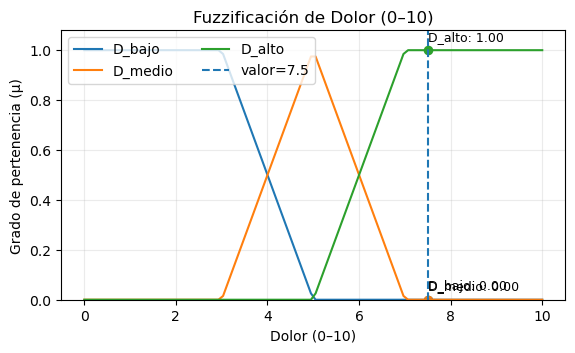

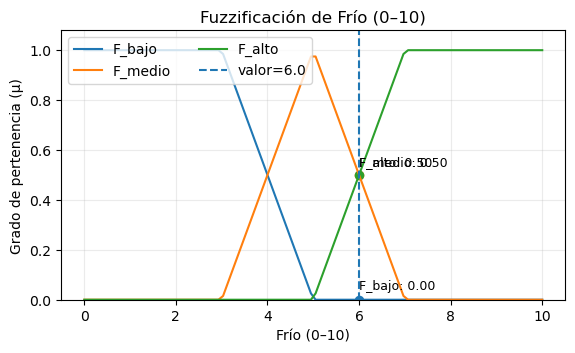

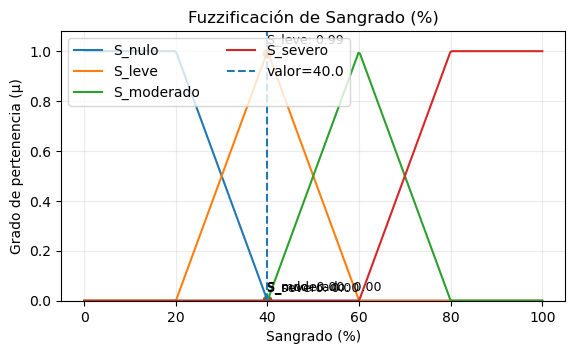

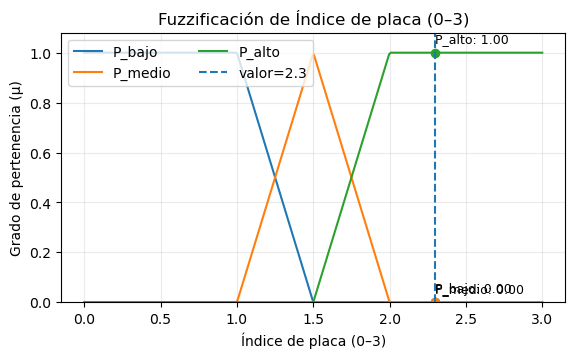

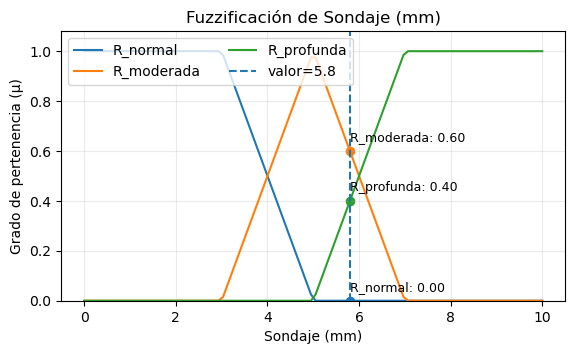

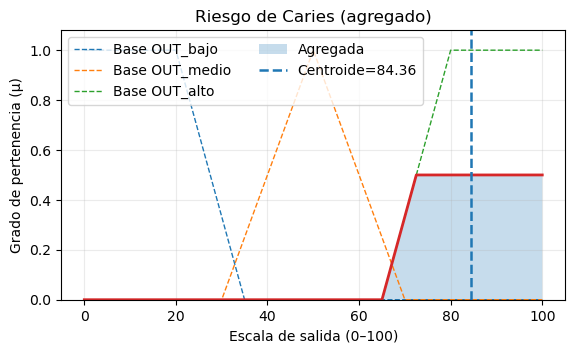

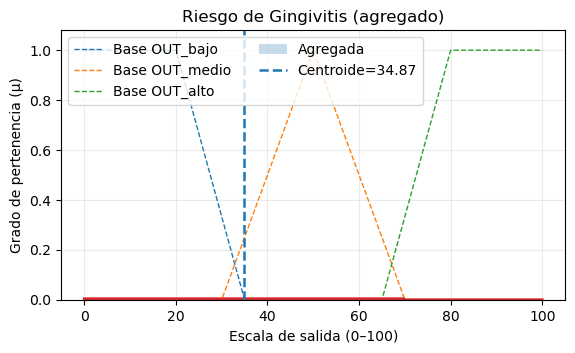

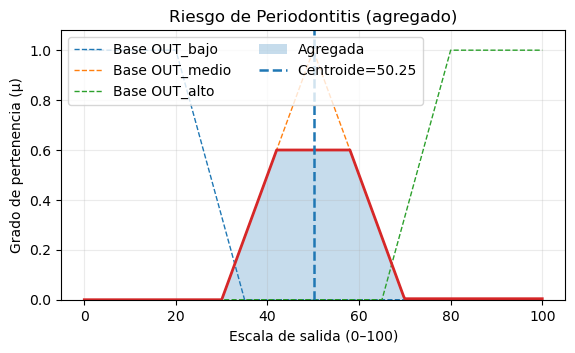

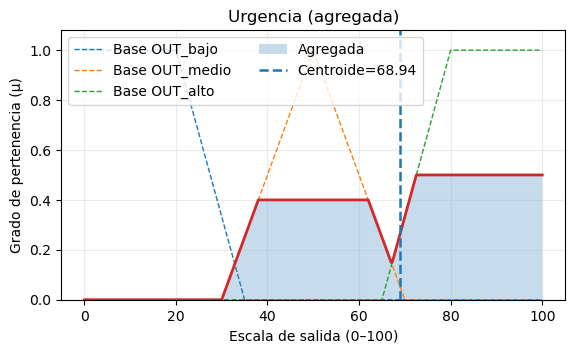

✅ Informe generado: informe_triaje_dental.pdf


In [96]:
# ================================================================
# 5) Ejemplo de prueba (valores modificables)
# ================================================================

# Entradas del paciente
dolor0   = 7.5   # 0–10
frio0    = 6.0   # 0–10
sang0    = 40.0  # 0–100 %
placa0   = 2.3   # 0–3
sondaje0 = 5.8   # 0–10 mm

# ----- helpers para interpretación de resultados -----
def clasificar(valor):
    """Devuelve etiqueta simple según el valor 0–100."""
    if valor < 35:
        return "bajo"
    elif valor < 70:
        return "medio"
    else:
        return "alto"

def recomendacion_urg(valor):
    """Sugerencia rápida en función de la urgencia."""
    if valor >= 70:
        return "Atención inmediata (24–48h)."
    elif valor >= 35:
        return "Cita prioritaria (≤ 1–2 semanas)."
    else:
        return "Control programado y prevención."

# ----- correr inferencia (Fases 2 + 3) -----
(vals, mfs) = inferir(dolor0, frio0, sang0, placa0, sondaje0, metodo='centroid')
caries_val, ginv_val, perio_val, urg_val = vals

# ----- salida legible -----
print("======== Resultado del triaje difuso ========")
print(f"Riesgo caries:        {caries_val:6.2f} / 100   ({clasificar(caries_val)})")
print(f"Riesgo gingivitis:    {ginv_val:6.2f} / 100   ({clasificar(ginv_val)})")
print(f"Riesgo periodontitis: {perio_val:6.2f} / 100   ({clasificar(perio_val)})")
print(f"Urgencia:             {urg_val:6.2f} / 100   ({clasificar(urg_val)})")
print("Recomendación:", recomendacion(urg_val))
visualizar_fuzzificacion_y_salidas(dolor0, frio0, sang0, placa0, sondaje0, metodo='centroid')
# Generar PDF descargable con este caso
generar_informe_pdf(
    filename='informe_triaje_dental.pdf',
    dolor0=dolor0, frio0=frio0, sang0=sang0, placa0=placa0, sondaje0=sondaje0,
    metodo='centroid',
    paciente_id='Esteban Quito, Armando',
    comentarios='Informe generado automáticamente a partir del triaje difuso.'
)